# Chapter 3

## Section 3.1: Exploring the Quantum States

In [1]:
# Listing 3.1 Verify Qiskit version
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}

In [2]:
# Listing 3.2: The first qubit
from qiskit import QuantumCircuit

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |1>
initial_state = [0,1]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0) 

In [3]:
# Listing 3.3: Prepare the simulation backend
from qiskit import execute, Aer

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend).result()

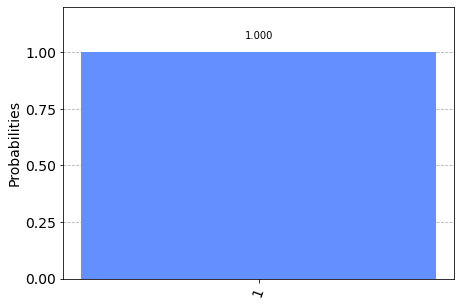

In [4]:
# Listing 3.4: The measured qubit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

In [5]:
# Listing 3.5: First attempt to superpose two states
# Define state |psi>
initial_state = [1, 1]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0) 

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

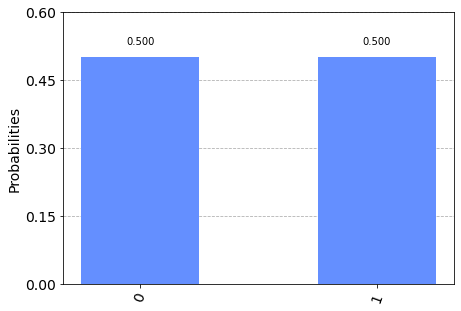

In [6]:
# Listing 3.6: Weighted initial state
from math import sqrt

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)] 

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0) 

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)

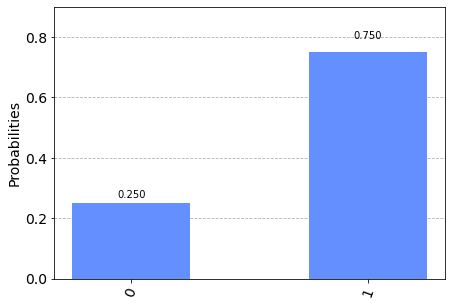

In [7]:
# Listing 3.7: The qubit with a probability of 0.25 to result in 0
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt

qc = QuantumCircuit(1)
initial_state = [1/2, sqrt(3)/2] # Here, we insert the state
qc.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

## Section 3.3: Bypassing The Normalization

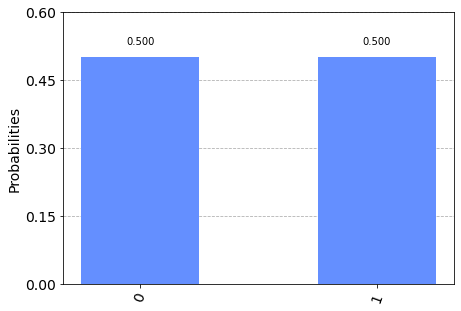

In [8]:
# Listing 3.8: Using theta to specify the quantum state vector
from math import pi, cos, sin
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def get_state (theta):
    """returns a valid state vector"""
    return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get a feeling
theta = -pi/2 # affects the probabilities


# create, initialize, and execute the quantum circuit
qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0) 
backend = Aer.get_backend('statevector_simulator') 
result = execute(qc,backend).result()
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

## Section 3.4Exploring The Observer Effect

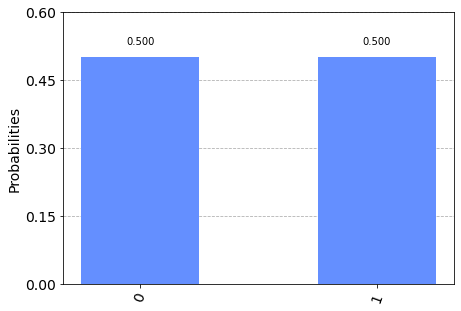

In [9]:
# Listing 3.9: A circuit without measurement
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)  

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)] 

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0) 

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)

In [10]:
# Listing 3.10: Draw the circuit
qc.draw(output='text')

┌─────────────────────────────┐
q_0: ┤ initialize(0.70711,0.70711) ├
     └─────────────────────────────┘

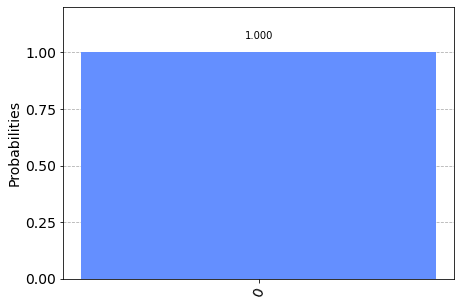

In [11]:
# Listing 3.11: Circuit with measurement
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

# observe the qubit
qc.measure_all()

# Do the simulation, returning the result
result = execute(qc,backend).result() 
counts = result.get_counts()
plot_histogram(counts)

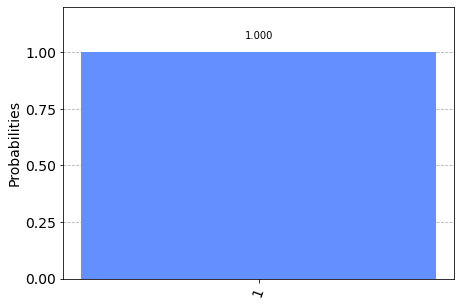

In [12]:
# Listing 3.12: Another circuit with measurement
qc = QuantumCircuit(1) 
qc.initialize(initial_state, 0)
qc.measure_all()
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [13]:
# Listing 3.13: Draw a circuit with measurement
qc.draw(output='text')

┌─────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0

## Section 3.5: Parameterized Quantum Circuit

In [14]:
# Listing 3.14: A simple PQC binary classifier
qc = QuantumCircuit(1) 
initial_state = [1/sqrt(2), 1/sqrt(2)] 
qc.initialize(initial_state, 0)
qc.measure_all()

In [15]:
# Listing 3.15: The parameterized quantum circuit classifier
from qiskit import execute, Aer, QuantumCircuit
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

def pqc_classify(backend, passenger_state):
    """backend -- a qiskit backend to run the quantum circuit at
    passenger_state -- a valid quantum state vector"""
    
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1) 

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state, 0)
    
    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=execute(qc,backend).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)
    
    # get the bit 0 or 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [17]:
# Listing 3.16: Load the data
import numpy as np

with open('data/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)

with open('data/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [21]:
# REDEFINE OR IMPORT THE FUNCTIONS OF CHAPTER 2
def run(f_classify, x):
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
#CAPTION A reusable function to unmask the hypocrite classifier

In [22]:
# Listing 3.17: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Specify the quantum state that results in either 0 or 1
initial_state = [1/sqrt(2), 1/sqrt(2)] 

classifier_report("Random PQC", 
    run,
    lambda passenger: pqc_classify(backend, initial_state),
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.38
The recall score of the Random PQC classifier is 0.55
The specificity score of the Random PQC classifier is 0.47
The npv score of the Random PQC classifier is 0.63
The information level is: 0.51


In [23]:
# Listing 3.18: Initialization of classical (pseudo‐)random
import random
random.seed(a=None, version=2)